In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import dataset
data_orig = pd.read_csv('../MA_PREDICTOR/data/ma_detailed_data_car.csv', parse_dates=['announcement_date'])
data_orig.head(10)

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,attitude,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Friendly,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,15,1,0.006854
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,Friendly,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,23,1,-0.009362
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Friendly,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,18,1,-0.011249
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Friendly,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,8,1,0.013061
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,Friendly,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,26,1,0.000000
5,1632555020,2005-01-18,232.22,15834.52,Colonial BancGroup Inc,CNB,"FFLC Bancorp Inc,Leesburg, Florida",United States,United States,Public,...,Friendly,Stock Swap,Lehman Brothers,Keefe Bruyette & Woods Inc,"Create synergies, eliminate duplicate services...",55101010,55101010,40,1,0.066480
6,1634502020,2005-01-26,2211.08,1105.45,Cimarex Energy Co,XEC,Magnum Hunter Resources Inc,United States,United States,Public,...,Friendly,Stock Swap,Petrie Parkman & Co Inc|Lehman Brothers,Deutsche Bank Securities|Merrill Lynch,Strengthen existing operations/expand presence...,50102020,50102020,0,1,-0.093760
7,1634618020,2005-01-26,1000.00,2514.99,Energy Transfer Partners LP,ETP,Houston Pipe Line Co,United States,United States,Subsidiary,...,Friendly,Divestiture,NaN,Lehman Brothers,Concentrate on core businesses/assets,50102030,59102010,0,1,0.000000
8,1634798040,2005-01-26,8.50,872.87,Photronics Inc,PLAB,PKL Co Ltd,South Korea,United States,Public,...,Neutral,Privately Negotiated Purchase,NaN,NaN,Acquire competitors technology/strategic assets,52102010,57101010,18,1,0.024273
9,1635132020,2005-01-28,54906.81,63032.00,Procter & Gamble Co,PG,Gillette Co,United States,United States,Public,...,Friendly,Stock Swap,Merrill Lynch,UBS Investment Bank|Goldman Sachs & Co,"Create synergies, eliminate duplicate services...",54201010,54201020,50,1,-0.046457


In [6]:
data_orig.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'acquisition_count', 'bidder_count',
       'car'],
      dtype='object')

In [7]:
# Removing outliers
data = data_orig[(data_orig.car > -0.3) & (data_orig.car < 0.3)]

# Creating Features

In [8]:
data['positive_car'] = data.car.apply(lambda elem: 'yes' if elem > 0 else 'no')
data.head(10)

/tmp/ipykernel_15377/980629907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['positive_car'] = data.car.apply(lambda elem: 'yes' if elem > 0 else 'no')


,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car,positive_car
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,Financial Acquiror|Divestiture,NaN,NaN,Strengthen existing operations/expand presence...,50102030,50103030,15,1,0.006854,yes
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,Tender Offer|Tender Merger,Lazard,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,23,1,-0.009362,no
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Stock Swap,NaN,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,18,1,-0.011249,no
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Tender Offer,Wilson HTM|Fleet National Bank|Fifth Third Bank,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,8,1,0.013061,yes
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,Divestiture,NaN,NaN,Acquire competitors technology/strategic assets,52102030,51201020,26,1,0.000000,no
5,1632555020,2005-01-18,232.22,15834.52,Colonial BancGroup Inc,CNB,"FFLC Bancorp Inc,Leesburg, Florida",United States,United States,Public,...,Stock Swap,Lehman Brothers,Keefe Bruyette & Woods Inc,"Create synergies, eliminate duplicate services...",55101010,55101010,40,1,0.066480,yes
6,1634502020,2005-01-26,2211.08,1105.45,Cimarex Energy Co,XEC,Magnum Hunter Resources Inc,United States,United States,Public,...,Stock Swap,Petrie Parkman & Co Inc|Lehman Brothers,Deutsche Bank Securities|Merrill Lynch,Strengthen existing operations/expand presence...,50102020,50102020,0,1,-0.093760,no
7,1634618020,2005-01-26,1000.00,2514.99,Energy Transfer Partners LP,ETP,Houston Pipe Line Co,United States,United States,Subsidiary,...,Divestiture,NaN,Lehman Brothers,Concentrate on core businesses/assets,50102030,59102010,0,1,0.000000,no
8,1634798040,2005-01-26,8.50,872.87,Photronics Inc,PLAB,PKL Co Ltd,South Korea,United States,Public,...,Privately Negotiated Purchase,NaN,NaN,Acquire competitors technology/strategic assets,52102010,57101010,18,1,0.024273,yes
9,1635132020,2005-01-28,54906.81,63032.00,Procter & Gamble Co,PG,Gillette Co,United States,United States,Public,...,Stock Swap,Merrill Lynch,UBS Investment Bank|Goldman Sachs & Co,"Create synergies, eliminate duplicate services...",54201010,54201020,50,1,-0.046457,no


In [9]:
# Defining which columns should be considered in detailed investigations
columns_to_inspect = [
    'deal_value',
    'acquiror_total_assets',
    'acquiror_name',
    'target_name',
    'acquiror_industry',
    'target_industry',
    'shares_acquired',
    'acquisition_technique',
    'purpose',
    'car',
    'announcement_date',
    'consideration_offered',
    'positive_car',
    'attitude',
    'target_status',
    'target_nation'
]

In [10]:
# Creating new dataframe for investigation
technique = data[['car']]

In [11]:
# unpack techniques and put them into set
techniques = set()
for index, row in data.iterrows():
    for technique in row.acquisition_technique.split('|'):
        if technique:
            techniques.add(technique)
techniques

{'Acquiror Includes Management',
 'Acquiror Is A White Knight',
 'Acquiror Is An Investor Group',
 'Asset Swap',
 'Auction',
 'Bankruptcy Acquisition',
 'Collar',
 'Concession',
 'Debt Restructuring',
 'Divestiture',
 'Financial Acquiror',
 'Going Private',
 'Institutional Buyout',
 'Internal Reorganization',
 'Joint Venture',
 'Leveraged Buyout',
 'Litigation',
 'Mandatory Offering',
 'Mergerof Equals',
 'Open Market Purchase',
 'Private Tender Offer',
 'Privately Negotiated Purchase',
 'Privatization',
 'Property Acquisition Flag',
 'Proxy Fight',
 'Restructuring',
 'Reverse Morris Trust',
 'Reverse Takeover',
 'Rumored Deal',
 'Sale and Leaseback',
 'Schemeof Arrangement',
 'Secondary Buyout',
 'Stock Swap',
 'Tender Merger',
 'Tender Offer',
 'Three Way Merger',
 'Unsolicited Deal'}

In [12]:
# Further investigation into 'Divestiture' and 'Stock Swap'
investigation = data.copy()

# Transforming pipes into lists of techniques used
list_gen = lambda x: x.split('|')
investigation['acquisition_technique'] = investigation.acquisition_technique.apply(list_gen)

# Cluster considerations
def fishy(techniques):
    
    # Define fishy techniques
    fishy_techniques = [
        'Reverse Takeover'
    ]
    
    # Label fishy techniques
    for technique in techniques:
        if technique in fishy_techniques:
            return 'fishy'
    return 'ok'

# Apply detector
investigation['red_flag'] = investigation.apply(lambda row: fishy(row.acquisition_technique), axis=1)

# Counting number of occurences
investigation.red_flag.value_counts()

ok       3250
fishy      47
Name: red_flag, dtype: int64

In [13]:
# Filtering out fishy deals
test = investigation[investigation.red_flag == 'fishy'][columns_to_inspect]
test.head(10)

,deal_value,acquiror_total_assets,acquiror_name,target_name,acquiror_industry,target_industry,shares_acquired,acquisition_technique,purpose,car,announcement_date,consideration_offered,positive_car,attitude,target_status,target_nation
285,351.10,2342.38,First Busey Corp,"Main Street Trust Inc, Champaign,Illinois",Banks,Banks,100.0,"[Mergerof Equals, Reverse Takeover, Stock Swap]","Create synergies, eliminate duplicate services...",0.016949,2006-09-20,Common Stock|Common Stock,yes,Friendly,Public,United States
434,54.08,37.68,Digital Music Group Inc,Orchard,Entertainment Production,"Appliances, Tools & Housewares",100.0,"[Stock Swap, Reverse Takeover]","Create synergies, eliminate duplicate services...",0.000000,2007-07-11,Common Stock|Convertible Preferred,no,Friendly,Private,United States
588,3300.00,3129.88,The JM Smucker Co,Folgers Coffee Co,Food Processing,Food Processing,100.0,"[Rumored Deal, Reverse Takeover, Reverse Morri...","Create synergies, eliminate duplicate services...",-0.003094,2008-06-04,Liabilities|Cash,no,No Applicable,Subsidiary,United States
596,6113.97,4534.40,Republic Services Inc,Allied Waste Industries Inc,Environmental Services & Equipment,Environmental Services & Equipment,100.0,"[Stock Swap, Rumored Deal, Reverse Takeover]",Increase shareholder value|Strengthen operations,-0.003654,2008-06-23,Common Stock|Common Stock,no,Friendly,Public,United States
685,38615.31,45529.00,Merck & Co Inc,Schering Plough Corp,Pharmaceuticals,Pharmaceuticals,100.0,"[Stock Swap, Reverse Takeover]",Allow to offer new products and services|Creat...,-0.040747,2009-03-09,Common Stock|Cash|Common Stock,no,Friendly,Public,United States
710,194.81,193.91,Cowen Group Inc,Ramius LLC,Investment Banking & Brokerage Services,Investment Management & Fund Operators,100.0,"[Reverse Takeover, Financial Acquiror, Stock S...",Strengthen operations,0.029448,2009-06-04,Common Stock,yes,Friendly,Subsidiary,United States
953,8.59,5.45,Targeted Genetics Corp,Biocontrol Ltd,Biotechnology & Medical Research,Biotechnology & Medical Research,100.0,"[Reverse Takeover, Stock Swap]","Create synergies, eliminate duplicate services...",0.000000,2010-11-12,Common Stock,no,Friendly,Subsidiary,Australia
1168,19.23,12.81,Inuvo Inc,Vertro Inc,Software,Online Services,100.0,"[Stock Swap, Reverse Takeover]",Increase shareholder value|Strengthen operations,-0.199847,2011-10-17,Common Stock,no,Friendly,Public,United States
1186,3685.58,6291.88,Alleghany Corp,Transatlantic Holdings Inc,Property & Casualty Insurance,Property & Casualty Insurance,100.0,"[Stock Swap, Reverse Takeover]","Create synergies, eliminate duplicate services...",-0.063655,2011-11-21,Common Stock|Cash,no,Friendly,Public,United States
1238,14.13,0.29,Phototron Holdings Inc,SG Technologies Corp,Construction Supplies & Fixtures,Heavy Machinery & Vehicles,100.0,"[Reverse Takeover, Stock Swap]",Allow to offer new products and services|Stren...,0.000000,2012-03-05,Preferred Stock|Common Stock,no,Friendly,Private,United States


In [14]:
test.shape

(47, 16)

In [15]:
test.acquiror_industry.value_counts()

Banks                                           6
Investment Holding Companies                    5
Real Estate Rental, Development & Operations    3
Pharmaceuticals                                 3
IT Services & Consulting                        3
Software                                        2
Natural Gas Utilities                           2
Environmental Services & Equipment              2
Commodity Chemicals                             1
Semiconductors                                  1
Corporate Financial Services                    1
Medical Equipment, Supplies & Distribution      1
Specialized REITs                               1
Industrial Machinery & Equipment                1
Non-Paper Containers & Packaging                1
Oil Related Services and Equipment              1
Personal Products                               1
Food Processing                                 1
Non-Gold Precious Metals & Minerals             1
Electric Utilities                              1


In [16]:
test['positive_car'].value_counts()

no     30
yes    17
Name: positive_car, dtype: int64

In [17]:
# Cluster_change_in_public_status:
'''
Reverse Takeover - Observations: 47, Positive Car: 25, Negative Car: 22; 
Acquiror Is An Investor Group(SPAC) - Observations: 1, Positive Car: 1;
Privatization - Observations: 11, Positive Car: 7, Negative Car: 4; 
Private Tender Offer - Observations: 1, Negative Car: 1;
Privately Negotiated Purchase - Observations: 116, Positive Car: 60, Negative Car: 56;
Secondary Buyout - Observations: 2, Negative Car: 2;
Going Private - Observations: 14, Positive Car: 5, Negative Car: 9;
Reverse LBO - Observations: , Positive Car: , Negative Car: ;
'''

# Cluster_swapping_assets:
'''
Mergerof Equals - Observations: 22, Positive Car: 9, Negative Car: 12;
Collar - Observations: 45, Positive Car: 22, Negative Car: 23;
Joint Venture - Observations: 17, Positive Car: 5, Negative Car: 12;
Reverse Morris Trust - Observations: 11, Positive Car: 4, Negative Car: 7;
Sale and Leaseback - Observations: 16, Positive Car: 7, Negative Car: 9;
Property Acquisition Flag - Observations: 135, Positive Car: 64, Negative Car: 71;
Concession - Observations: 1, Positive Car: 1;
'''

# Cluster_divestiture:
'''
Institutional Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Leveraged Buyout - Observations: 100, Positive Car: 45, Negative Car: 55;
Divestiture - Observations: 1871, Positive Car: 1029, Negative Car: 842;
Tender Merger - Observations: 131, Positive Car: 71, Negative Car: 60;
Tender Offer - Observations: 162, Positive Car: 88, Negative Car: 74;
Open Market Purchase - Observations: 3, Positive Car: 1, Negative Car: 2;
Financial Acquiror - Observations: 617, Positive Car: 323, Negative Car: 294;
Debt Restructuring - Observations: 2, Negative Car: 2;
Internal Reorganization - Observations: 14, Positive Car: 4, Negative Car: 10;
Three Way Merger - Observations: 4, Positive Car: 3, Negative Car: 1;
Rumored Deal - Observations: 352, Positive Car: 180, Negative Car: 172;
'''

# Cluster_miscellaneous:
'''
Litigation - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Includes Management - Observations: 2, Positive Car: 1, Negative Car: 1;
Acquiror Is A White Knight - Observations: 3, Positive Car: 1, Negative Car: 2;
Schemeof Arrangement - Observations: 57, Positive Car: 21, Negative Car: 36;
Mandatory Offering - Observations: 4, Positive Car: 1, Negative Car: 3;
Proxy Fight - Observations: 4, Positive Car: 2, Negative Car: 2;
Unsolicited Deal - Observations: 33, Positive Car: 18, Negative Car: 15;
'''

# Cluster_bankruptcy:
'''
Bankruptcy Acquisition - Observations: 32, Positive Car: 18, Negative Car: 14;
Restructuring - Observations: 28, Positive Car: 15, Negative Car: 13;
Auction - Observations: 34, Positive Car: 19, Negative Car: 15;
'''

'\nBankruptcy Acquisition - Observations: 32, Positive Car: 18, Negative Car: 14;\nRestructuring - Observations: 28, Positive Car: 15, Negative Car: 13;\nAuction - Observations: 34, Positive Car: 19, Negative Car: 15;\n'

In [35]:
data_clean = data.copy()

data_clean['acquisition_technique_clean'] = data_clean['acquisition_technique'].apply(lambda x: x[:x.find('|')] if '|' in x else x)

data_clean[["acquisition_technique", "acquisition_technique_clean"]]

,acquisition_technique,acquisition_technique_clean
0,Financial Acquiror|Divestiture,Financial Acquiror
1,Tender Offer|Tender Merger,Tender Offer
2,Stock Swap,Stock Swap
3,Tender Offer,Tender Offer
4,Divestiture,Divestiture
...,...,...
3325,Stock Swap,Stock Swap
3326,Financial Acquiror,Financial Acquiror
3327,Divestiture,Divestiture
3328,Stock Swap,Stock Swap


In [24]:
def get_cluster(technique):
    cluster_dict = {
        'private_companies': ['Reverse Takeover',
                              'Acquiror Is An Investor Group',
                              'Privatization',
                              'Private Tender Offer',
                              'Privately Negotiated Purchase',
                              'Secondary Buyout', 
                              'Going Private',
                              0,
                              0,
                              0,
                              0,
                              0,
                              0],
        'asset_driven_op': ['Mandatory Offering',
                            'Mergerof Equals',
                            'Collar',
                            'Joint Venture', 
                            'Reverse Morris Trust',
                            'Sale and Leaseback',
                            'Property Acquisition Flag',
                            'Concession',
                            'Asset Swap',
                            'Stock Swap',
                            0,
                            0,
                            0],
        'divestiture': ['Divestiture', 
                        'Institutional Buyout', 
                        'Leveraged Buyout',
                        'Tender Merger',
                        'Tender Offer', 
                        'Open Market Purchase',
                        'Financial Acquiror', 
                        'Debt Restructuring', 
                        'Internal Reorganization',
                        'Three Way Merger',
                        'Rumored Deal',
                        'Schemeof Arrangement',
                        'Unsolicited Deal'],
        'possible_problematic': ['Litigation',
                                 'Acquiror Includes Management',
                                 'Acquiror Is A White Knight',
                                 'Proxy Fight',
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0,
                                 0],
        'bankruptcy': ['Bankruptcy Acquisition',
                       'Restructuring',
                       'Auction',
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,
                       0,]
                                 
    }
    #cluster_df = pd.DataFrame(cluster_dict)
    for k, v in cluster_dict.items():
        if technique in v:
            return k

data_1 = data_clean.copy()
data_1['cluster_category'] = data_clean['acquisition_technique_clean'].apply(get_cluster)
    

    
    
get_cluster("Leveraged Buyout")    
    
    #if "Auction" in cluster_df.to_numpy():
        #return True
    
#print(get_cluster(1))

'divestiture'

In [25]:
data_1

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car,positive_car,acquisition_technique_clean,cluster_category
0,1631732020,2005-01-01,12.00,3160.41,Plains All American Pipeline LP,PAA,Shell Pipeline Co LP-Crude Oil Pipeline Assets...,United States,United States,Subsidiary,...,NaN,Strengthen existing operations/expand presence...,50102030,50103030,15,1,0.006854,yes,Financial Acquiror,divestiture
1,1629274020,2005-01-04,153.67,6166.05,SuperValu Inc,SVU,Total Logistics Inc,United States,United States,Public,...,William Blair & Co,Strengthen existing operations/expand presence...,54301020,52405030,23,1,-0.009362,no,Tender Offer,divestiture
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,18,1,-0.011249,no,Stock Swap,asset_driven_op
3,1631266040,2005-01-12,427.54,1116.90,Cleveland-Cliffs Inc,CLF,Portman Ltd,Australia,United States,Public,...,Gresham Partners|Azure Capital,Strengthen existing operations/expand presence...,51201020,51201020,8,1,0.013061,yes,Tender Offer,divestiture
4,1632176020,2005-01-14,16.00,1722.27,Thomas & Betts Corp,TNB,Southern Monopole & Utilities Co,United States,United States,Subsidiary,...,NaN,Acquire competitors technology/strategic assets,52102030,51201020,26,1,0.000000,no,Divestiture,divestiture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,NaN,Strengthen operations,57201020,57201020,1,1,0.088395,yes,Stock Swap,asset_driven_op
3326,3778220020,2021-07-19,335.00,1240.31,Rapid7 Inc,RPD,Intsights Cyber Intelligence Ltd,United States,United States,Private,...,NaN,Strengthen operations,57201020,57201020,6,1,0.068755,yes,Financial Acquiror,divestiture
3327,3777682020,2021-07-28,1450.00,6234.00,Avery Dennison Corp,AVY,Vestcom International Inc,United States,United States,Subsidiary,...,RBC Capital Markets LLC|Jefferies LLC|Robert W...,"Create synergies, eliminate duplicate services...",51302020,53302010,21,1,0.022186,yes,Divestiture,divestiture
3328,3790420020,2021-08-05,280.00,1229.78,Insmed Inc,INSM,Motus Biosciences Inc,United States,United States,Private,...,NaN,Strengthen operations,56202010,56202010,1,1,-0.150752,no,Stock Swap,asset_driven_op


In [33]:
data_1[(data_1["cluster_category"].isna())]["acquisition_technique_clean"].value_counts()

    2
Name: acquisition_technique_clean, dtype: int64

In [26]:
data_1[(data_1["cluster_category"] != "divestiture") & (~data_1["cluster_category"].isna())]

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car,positive_car,acquisition_technique_clean,cluster_category
2,1631278020,2005-01-11,89.16,11127.95,Fulton Financial Corp,FULT,"SVB Financial Services Inc, Sommerville,New Je...",United States,United States,Public,...,Danielson Associates Inc,Expand presence in new/foreign markets,55101010,55101010,18,1,-0.011249,no,Stock Swap,asset_driven_op
5,1632555020,2005-01-18,232.22,15834.52,Colonial BancGroup Inc,CNB,"FFLC Bancorp Inc,Leesburg, Florida",United States,United States,Public,...,Keefe Bruyette & Woods Inc,"Create synergies, eliminate duplicate services...",55101010,55101010,40,1,0.066480,yes,Stock Swap,asset_driven_op
6,1634502020,2005-01-26,2211.08,1105.45,Cimarex Energy Co,XEC,Magnum Hunter Resources Inc,United States,United States,Public,...,Deutsche Bank Securities|Merrill Lynch,Strengthen existing operations/expand presence...,50102020,50102020,0,1,-0.093760,no,Stock Swap,asset_driven_op
8,1634798040,2005-01-26,8.50,872.87,Photronics Inc,PLAB,PKL Co Ltd,South Korea,United States,Public,...,NaN,Acquire competitors technology/strategic assets,52102010,57101010,18,1,0.024273,yes,Privately Negotiated Purchase,private_companies
9,1635132020,2005-01-28,54906.81,63032.00,Procter & Gamble Co,PG,Gillette Co,United States,United States,Public,...,UBS Investment Bank|Goldman Sachs & Co,"Create synergies, eliminate duplicate services...",54201010,54201020,50,1,-0.046457,no,Stock Swap,asset_driven_op
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,3748902020,2021-06-02,3050.81,5247.00,Southwestern Energy Co,SWN,Indigo Natural Resources LLC,United States,United States,Private,...,Credit Suisse Securities (USA),Increase shareholder value|Strengthen operatio...,50102020,50102020,7,1,0.087774,yes,Stock Swap,asset_driven_op
3316,3751055020,2021-06-07,1998.18,1106.12,1Life Healthcare Inc,ONEM,Iora Health Inc,United States,United States,Private,...,Credit Suisse,"Create synergies, eliminate duplicate services...",56102010,56102010,0,1,-0.057847,no,Stock Swap,asset_driven_op
3323,3776157020,2021-07-12,35.19,839.86,Select Energy Services Inc,WTTR,Complete Energy Services Inc,United States,United States,Private,...,NaN,Expand presence in new/foreign markets,50103020,59101010,1,1,0.000000,no,Stock Swap,asset_driven_op
3325,3774828020,2021-07-19,625.00,5969.17,Bill.com Holdings Inc,BILL,Invoice2go Inc,United States,United States,Private,...,NaN,Strengthen operations,57201020,57201020,1,1,0.088395,yes,Stock Swap,asset_driven_op


In [27]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3329
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3297 non-null   int64         
 1   announcement_date            3297 non-null   datetime64[ns]
 2   deal_value                   3297 non-null   float64       
 3   acquiror_total_assets        3297 non-null   float64       
 4   acquiror_name                3297 non-null   object        
 5   acquiror_ticker              3297 non-null   object        
 6   target_name                  3297 non-null   object        
 7   target_nation                3297 non-null   object        
 8   acquiror_nation              3297 non-null   object        
 9   target_status                3297 non-null   object        
 10  acquiror_industry            3297 non-null   object        
 11  target_industry              3297 non-null 

<AxesSubplot:xlabel='cluster_category'>

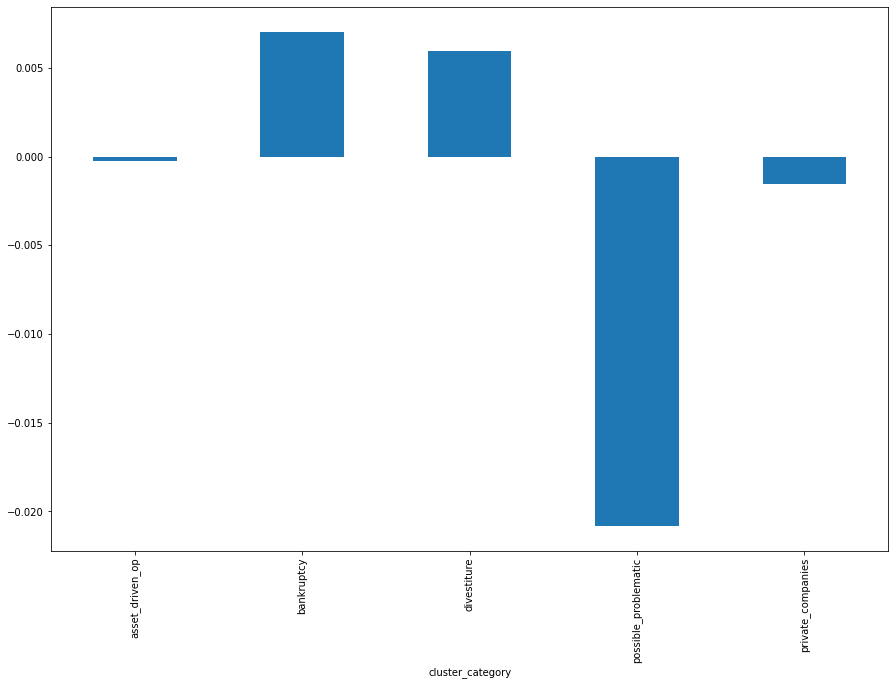

In [30]:
plt.figure(figsize=(15, 10))
data_1.groupby('cluster_category')['car'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cluster_category'>

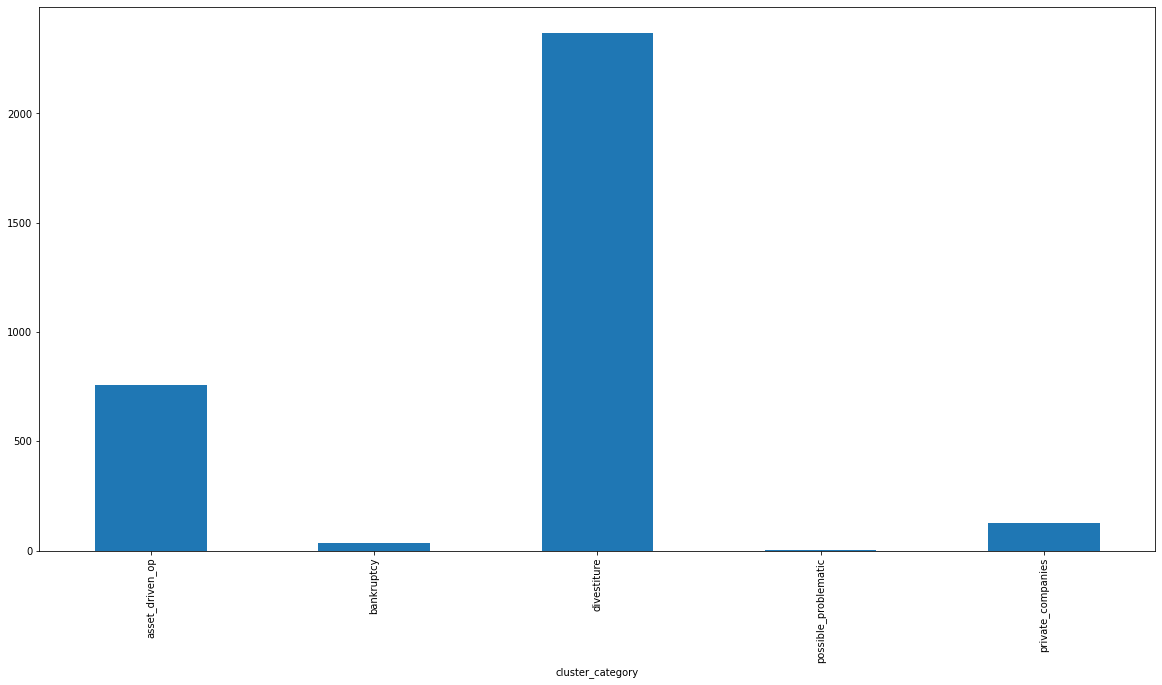

In [31]:
plt.figure(figsize=(20, 10))
data_1.groupby('cluster_category')['id'].count().plot(kind='bar')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'divestiture'),
  Text(1, 0, 'asset_driven_op'),
  Text(2, 0, 'private_companies'),
  Text(3, 0, 'bankruptcy'),
  Text(4, 0, 'possible_problematic')])

<Figure size 1800x720 with 0 Axes>

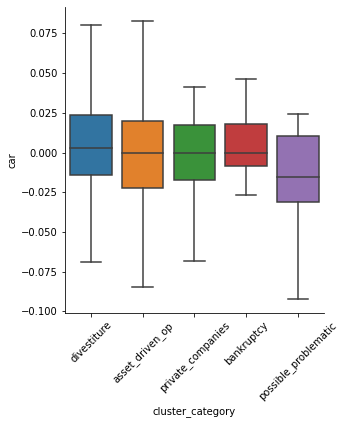

In [32]:
plt.figure(figsize=(25, 10))
sns.catplot(data=data_1, x='cluster_category', y='car', kind='box', showfliers=False)
plt.xticks(rotation=45)

# Data Exploration

## Details on merges

Looking at companies that performed an internal merger  

In [38]:
# Filtering the dataset to see how many companies perfermormed an internal merger

data_filter = data.loc[data['acquiror_name'] == data['target_name']]
data_filter

,id,announcement_date,deal_value,acquiror_total_assets,acquiror_name,acquiror_ticker,target_name,target_nation,acquiror_nation,target_status,...,acquisition_technique,acquiror_financial_advisor,target_financial_advisor,purpose,acquiror_code,target_code,acquisition_count,bidder_count,car,positive_car


Looking at the CAR values in the internal mergers

In [41]:
(data.shares_acquired == 100).apply(int)

0       1
1       1
2       1
3       0
4       1
       ..
3325    1
3326    1
3327    1
3328    1
3329    1
Name: shares_acquired, Length: 3297, dtype: int64

In [42]:
data_tmp = data.copy()
data_tmp['tot'] = (data.shares_acquired == 100).apply(int)
data_tmp['maj'] = (data.shares_acquired > 50).apply(int)
data_tmp['self'] = (data['acquiror_name'] == data['target_name']).apply(int)

In [ ]:
sns.catplot(data=df_tmp, x='self', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='maj', y='car', kind='box', showfliers=False)

In [ ]:
sns.catplot(data=df_tmp, x='tot', y='car', kind='box', showfliers=False)

In [ ]:
performance_acquiror = df_filter.groupby('acquiror_name')['car']
performance_acquiror

In [ ]:
plt.figure(figsize=(15, 50))
#df_filter.groupby('acquiror_name')['car'].mean().plot()
sns.barplot(data=df_filter,x='car', y='acquiror_name')